
Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] "Datos del dataframe de estudiantes INGENIERIA DE TRANSPORTE Y VIAS:"

,facult,programs,prom_grad.10,genre
,<fct>,<fct>,<dbl>,<fct>
1,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.5,M
2,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,4.0,F
3,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.8,M
4,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.6,F
5,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.6,M
6,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.2,F


[1] "Total de estudiantes de INGENIERIA DE TRANSPORTE Y VIAS:"

[1] 46

[1] "Datos del dataframe con la columna performance"

,facult,programs,prom_grad.10,genre,performance
,<fct>,<fct>,<dbl>,<fct>,<chr>
1,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.5,M,media
2,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,4.0,F,alto
3,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.8,M,media
4,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.6,F,media
5,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.6,M,media
6,INGENIERIA,INGENIERIA DE TRANSPORTE Y VIAS,3.2,F,bajo


[1] "Tabla de contingencia estudiantes de INGENIERIA DE TRANSPORTE Y VIAS"

       
         F  M
  alto   2  4
  bajo   2  3
  media 14 21

[1] "Cantidad de estudiantes de INGENIERIA DE TRANSPORTE Y VIAS agrupado por el rangos de notas (performance)"

alto  bajo media 
    6     5    35

[1] "Cantidad de estudiantes de INGENIERIA DE TRANSPORTE Y VIAS agrupado por el genero"

F  M 
18 28

[1] "Tabla con promedios usando base total de estudiantes - INGENIERIA DE TRANSPORTE Y VIAS"

       
                F         M
  alto   4.347826  8.695652
  bajo   4.347826  6.521739
  media 30.434783 45.652174

[1] "Tabla con promedios usando como base las filas (la suma por notas) - INGENIERIA DE TRANSPORTE Y VIAS"

       
               F        M
  alto  33.33333 66.66667
  bajo  40.00000 60.00000
  media 40.00000 60.00000

[1] "Tabla con promedios usando como base las columnas (la suma de genero) - INGENIERIA DE TRANSPORTE Y VIAS"

       
               F        M
  alto  11.11111 14.28571
  bajo  11.11111 10.71429
  media 77.77778 75.00000

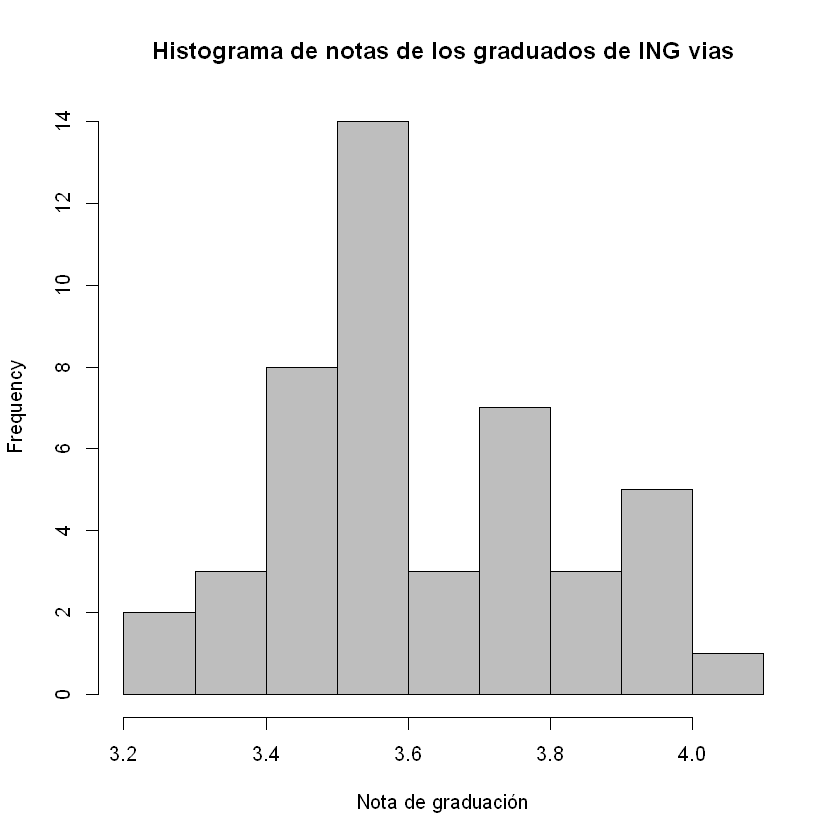

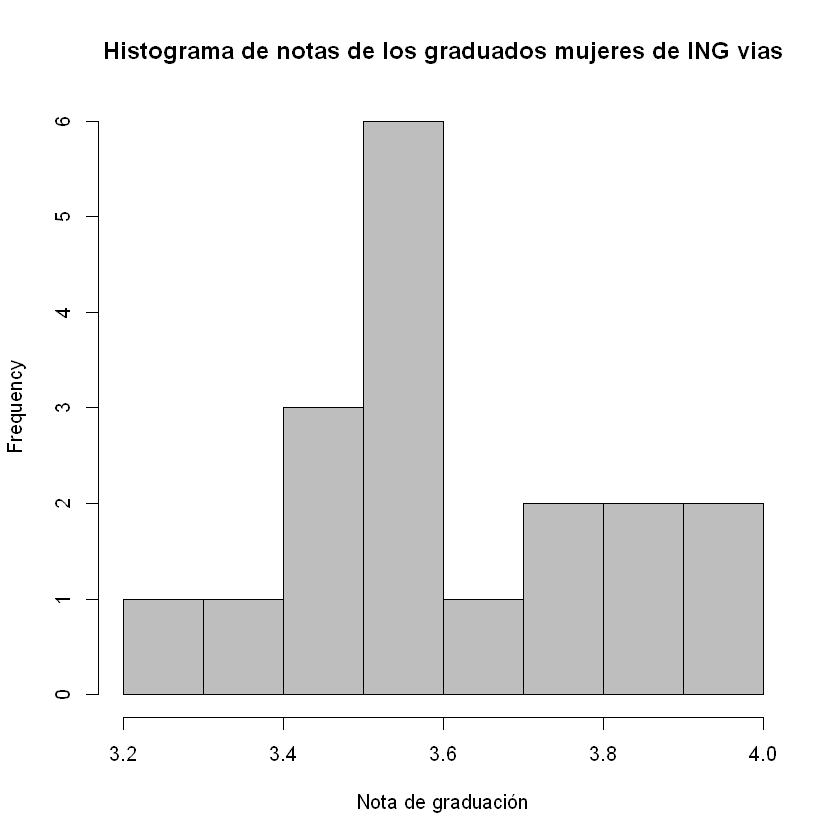

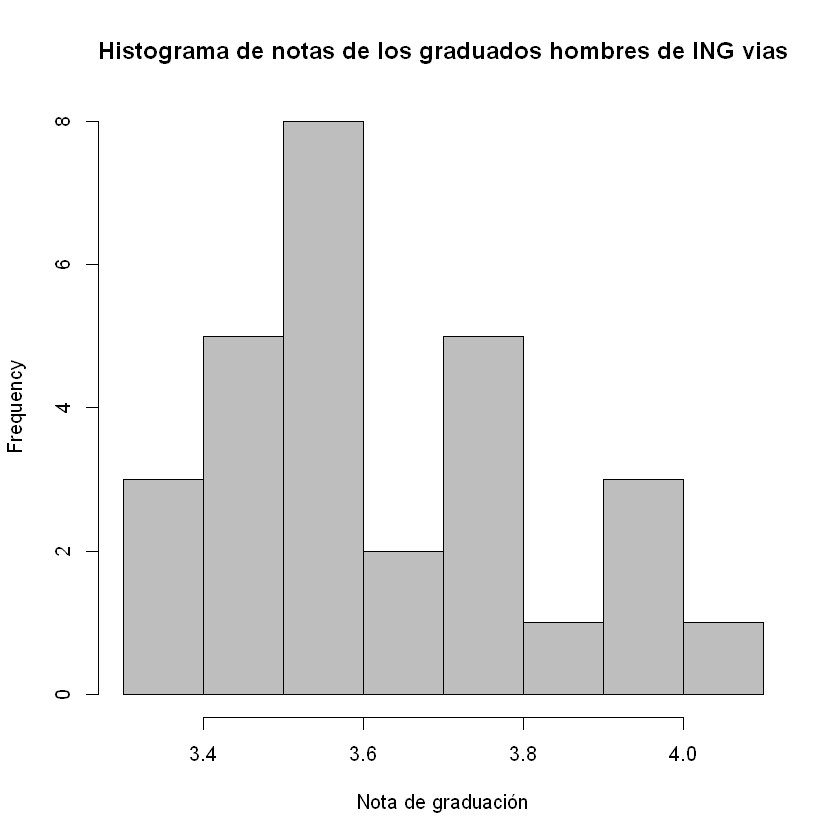

In [2]:
# Get data set from web
df_all <- read.csv("https://www.datos.gov.co/api/views/ha9e-e48s/rows.csv?accessType=DOWNLOAD")

facult <-df_all$NOMBRE_FACULTAD
programs <-df_all$NOMBRE_PROGRAMA
prom_grad <-df_all$PACUMULADO
genre <-df_all$SEXO


# Create a sub dataframe with certain columns
df_all_facu_promg_prom <- data.frame(facult, programs, prom_grad/10, genre)


library(dplyr)
# Filter to get only engineering facult
df_fac_eng <- filter(df_all_facu_promg_prom, df_all_facu_promg_prom$facult=="INGENIERIA")

# Remove data (rows) where are null
df_fac_eng$programs<-droplevels(df_fac_eng$programs)


## Analysis in students of INGENIERIA DE TRANSPORTE Y VIAS
# Get students only of INGENIERIA DE TRANSPORTE Y VIAS
df_fac_eng_engTransWays <- filter(df_fac_eng, df_fac_eng$programs=="INGENIERIA DE TRANSPORTE Y VIAS")

df_fac_eng_engTransWays$programs<-droplevels(df_fac_eng_engTransWays$programs)
df_fac_eng_engTransWays$facult<-droplevels(df_fac_eng_engTransWays$facult)
df_fac_eng_engTransWays$genre<-droplevels(df_fac_eng_engTransWays$genre)

sprintf('Datos del dataframe de estudiantes INGENIERIA DE TRANSPORTE Y VIAS:')
head(df_fac_eng_engTransWays)

sprintf('Total de estudiantes de INGENIERIA DE TRANSPORTE Y VIAS:')
length(df_fac_eng_engTransWays$prom_grad.10)

# Create a new colum where defines prom range 
df_fac_eng_engTransWays$performance[df_fac_eng_engTransWays$prom_grad.10 < 3.5] <- "bajo"
df_fac_eng_engTransWays$performance[df_fac_eng_engTransWays$prom_grad.10 >= 3.5 & df_fac_eng_engTransWays$prom_grad.10 < 4.0] <- "media"
df_fac_eng_engTransWays$performance[df_fac_eng_engTransWays$prom_grad.10 >= 4 & df_fac_eng_engTransWays$prom_grad.10 < 4.5] <- "alto"
df_fac_eng_engTransWays$performance[df_fac_eng_engTransWays$prom_grad.10 >= 4.5 & df_fac_eng_engTransWays$prom_grad.10 <= 5] <- "muy alto"

sprintf('Datos del dataframe con la columna performance')
head(df_fac_eng_engTransWays)


# Contingency table
tab_genre_perf_TransWays<-table(df_fac_eng_engTransWays$performance, df_fac_eng_engTransWays$genre)
# https://www.datacamp.com/community/tutorials/contingency-tables-r
sprintf('Tabla de contingencia estudiantes de INGENIERIA DE TRANSPORTE Y VIAS')
tab_genre_perf_TransWays

sprintf("Cantidad de estudiantes de INGENIERIA DE TRANSPORTE Y VIAS agrupado por el rangos de notas (performance)")
rowSums(tab_genre_perf_TransWays)

sprintf("Cantidad de estudiantes de INGENIERIA DE TRANSPORTE Y VIAS agrupado por el genero")
colSums(tab_genre_perf_TransWays)

# Percentages from contingency table
tab_prop<-prop.table(tab_genre_perf_TransWays)*100 # multiply by 100 set percentages 0 to 100

sprintf("Tabla con promedios usando base total de estudiantes - INGENIERIA DE TRANSPORTE Y VIAS")
tab_prop

sprintf("Tabla con promedios usando como base las filas (la suma por notas) - INGENIERIA DE TRANSPORTE Y VIAS")
tab_prop_row<-prop.table(tab_genre_perf_TransWays, margin=1)*100
tab_prop_row

sprintf("Tabla con promedios usando como base las columnas (la suma de genero) - INGENIERIA DE TRANSPORTE Y VIAS")
tab_prop_col<-prop.table(tab_genre_perf_TransWays, margin=2)*100
tab_prop_col



df_fac_eng_engTransWays_women <- filter(df_fac_eng_engTransWays, df_fac_eng_engTransWays$genre=="F")

df_fac_eng_engTransWays_men <- filter(df_fac_eng_engTransWays, df_fac_eng_engTransWays$genre=="M")

hist(df_fac_eng_engTransWays$prom_grad.10, main="Histograma de notas de los graduados de ING vias",xlab = "Nota de graduación",col = "gray",border = "black")#, xlim = c(3,5))

hist(df_fac_eng_engTransWays_women$prom_grad.10, main="Histograma de notas de los graduados mujeres de ING vias",xlab = "Nota de graduación",col = "gray",border = "black")#, xlim = c(3,5))

hist(df_fac_eng_engTransWays_men$prom_grad.10, main="Histograma de notas de los graduados hombres de ING vias",xlab = "Nota de graduación",col = "gray",border = "black")#, xlim = c(3,5))






# Tomar de una misma facultad 2 programas
# Indicar en proporción quien rinde mas si hombres o mujeres
# Tabla de contingencia
# A la tabla de contingencia un histograma

[1] "Datos del dataframe de estudiantes INGENIERIA AMBIENTAL:"

,facult,programs,prom_grad.10,genre
,<fct>,<fct>,<dbl>,<fct>
1,F,INGENIERIA AMBIENTAL,4.0,F
2,M,INGENIERIA AMBIENTAL,4.1,M
3,F,INGENIERIA AMBIENTAL,4.0,F
4,F,INGENIERIA AMBIENTAL,3.5,F
5,M,INGENIERIA AMBIENTAL,3.8,M
6,F,INGENIERIA AMBIENTAL,4.0,F


[1] "Total de estudiantes de INGENIERIA AMBIENTAL:"

[1] 61

[1] "Datos del dataframe con la columna performance"

,facult,programs,prom_grad.10,genre,performance
,<fct>,<fct>,<dbl>,<fct>,<chr>
1,F,INGENIERIA AMBIENTAL,4.0,F,alto
2,M,INGENIERIA AMBIENTAL,4.1,M,alto
3,F,INGENIERIA AMBIENTAL,4.0,F,alto
4,F,INGENIERIA AMBIENTAL,3.5,F,media
5,M,INGENIERIA AMBIENTAL,3.8,M,media
6,F,INGENIERIA AMBIENTAL,4.0,F,alto


[1] "Tabla de contingencia"

       
         F  M
  alto  12  5
  bajo   1  1
  media 23 19

[1] "Cantidad de estudiantes dado por el rangos de notas"

alto  bajo media 
   17     2    42

[1] "Cantidad de estudiantes dado por el genero"

F  M 
36 25

[1] "Tabla con promedios con base total de estudiantes"

       
                F         M
  alto  19.672131  8.196721
  bajo   1.639344  1.639344
  media 37.704918 31.147541

[1] "Tabla con promedios con base las filas (la suma por notas)"

       
               F        M
  alto  70.58824 29.41176
  bajo  50.00000 50.00000
  media 54.76190 45.23810

[1] "Tabla con promedios con base las columnas (la suma de genero)"

       
                F         M
  alto  33.333333 20.000000
  bajo   2.777778  4.000000
  media 63.888889 76.000000

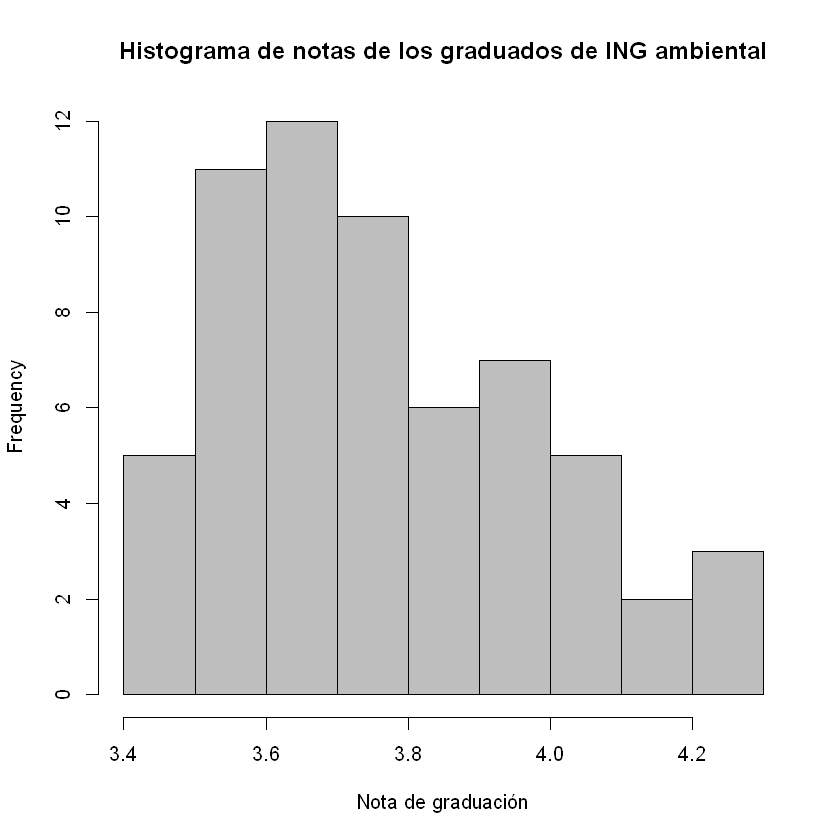

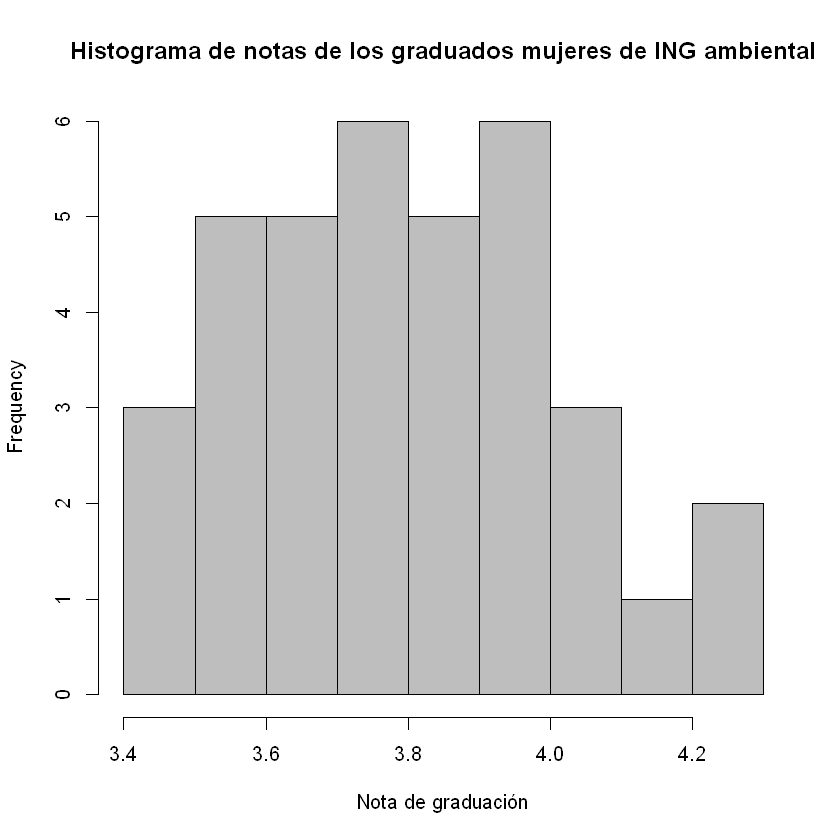

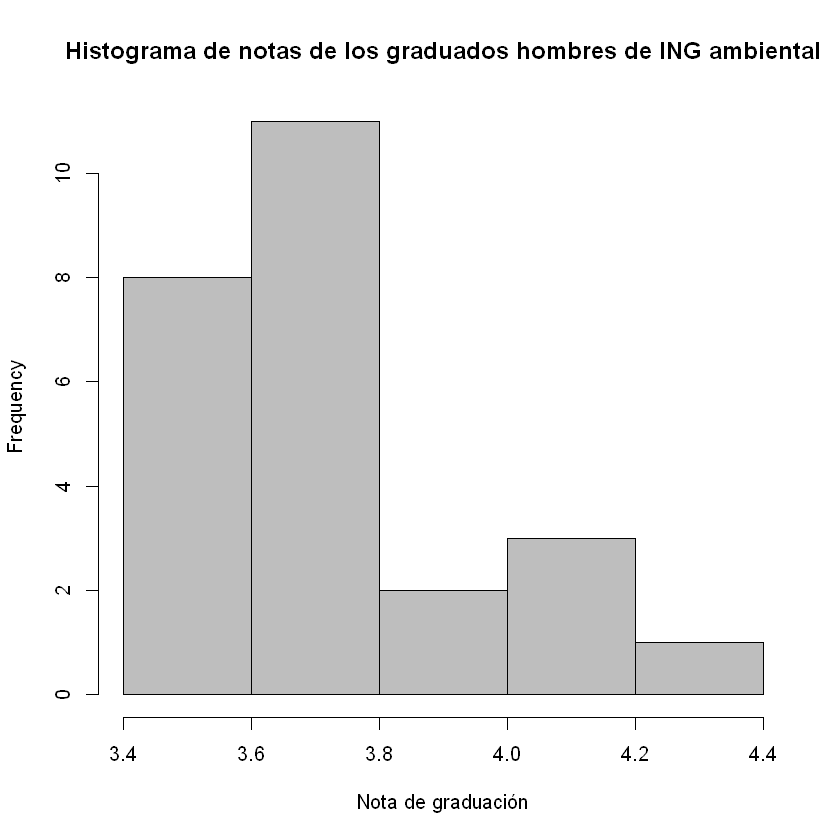

In [45]:
# Get students only of INGENIERIA AMBIENTAL
df_fac_eng_engEnv <- filter(df_fac_eng, df_fac_eng$programs=="INGENIERIA AMBIENTAL")

df_fac_eng_engEnv$programs<-droplevels(df_fac_eng_engEnv$programs)
df_fac_eng_engEnv$facult<-droplevels(df_fac_eng_engEnv$facult)
df_fac_eng_engEnv$genre<-droplevels(df_fac_eng_engEnv$genre)

sprintf('Datos del dataframe de estudiantes INGENIERIA AMBIENTAL:')
head(df_fac_eng_engEnv)

sprintf('Total de estudiantes de INGENIERIA AMBIENTAL:')
length(df_fac_eng_engEnv$prom_grad.10)

# Create a new colum where defines prom range 
df_fac_eng_engEnv$performance[df_fac_eng_engEnv$prom_grad.10 < 3.5] <- "bajo"
df_fac_eng_engEnv$performance[df_fac_eng_engEnv$prom_grad.10 >= 3.5 & df_fac_eng_engEnv$prom_grad.10 < 4.0] <- "media"
df_fac_eng_engEnv$performance[df_fac_eng_engEnv$prom_grad.10 >= 4 & df_fac_eng_engEnv$prom_grad.10 < 4.5] <- "alto"
df_fac_eng_engEnv$performance[df_fac_eng_engEnv$prom_grad.10 >= 4.5] <- "muy alto"

sprintf('Datos del dataframe con la columna performance')
head(df_fac_eng_engEnv)


# Contingency table
tab_genre_perf_engEnv<-table(df_fac_eng_engEnv$performance, df_fac_eng_engEnv$genre)
# https://www.datacamp.com/community/tutorials/contingency-tables-r
sprintf('Tabla de contingencia')
tab_genre_perf_engEnv

sprintf("Cantidad de estudiantes dado por el rangos de notas")
rowSums(tab_genre_perf_engEnv)

sprintf("Cantidad de estudiantes dado por el genero")
colSums(tab_genre_perf_engEnv)

# Percentages from contingency table
tab_prop<-prop.table(tab_genre_perf_engEnv)*100 # multiply by 100 set percentages 0 to 100

sprintf("Tabla con promedios con base total de estudiantes")
tab_prop

sprintf("Tabla con promedios con base las filas (la suma por notas)")
tab_prop_row<-prop.table(tab_genre_perf_engEnv, margin=1)*100
tab_prop_row

sprintf("Tabla con promedios con base las columnas (la suma de genero)")
tab_prop_col<-prop.table(tab_genre_perf_engEnv, margin=2)*100
tab_prop_col



df_fac_eng_engEnv_women <- filter(df_fac_eng_engEnv, df_fac_eng_engEnv$genre=="F")

df_fac_eng_engEnv_men <- filter(df_fac_eng_engEnv, df_fac_eng_engEnv$genre=="M")

hist(df_fac_eng_engEnv$prom_grad.10, main="Histograma de notas de los graduados de ING ambiental",xlab = "Nota de graduación",col = "gray",border = "black")

hist(df_fac_eng_engEnv_women$prom_grad.10, main="Histograma de notas de los graduados mujeres de ING ambiental",xlab = "Nota de graduación",col = "gray",border = "black")

hist(df_fac_eng_engEnv_men$prom_grad.10, main="Histograma de notas de los graduados hombres de ING ambiental",xlab = "Nota de graduación",col = "gray",border = "black")


# Datos durante analisis

## tipo categoricos
Los categoricos califican o indican a razón de valores determinados, normalmente suelen ser cadenas de caracteres, para poder ejecutar analisis una forma es darle una conversión númerica

